In [1]:
import os, glob, time, random, argparse, cv2, numpy as np,pandas as pd ,PIL
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
path="E:/python_projects/whale_dectection/CNN_MarineMammal_Prediction/trainimage"
# find .jpg and JPEG files in subdirectories
for subdir in os.listdir(path):
        # find .jpg and JPEG files in subdirectories
        for filename in glob.glob(os.path.join(path, subdir, '*.jpg')):
            # read image
            img = cv2.imread(filename)
            # convert to RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # pring their dimensions
            #print(img.shape)
            # reshape all images to a common size
            img = cv2.resize(img, (224, 224))
            # save image
            cv2.imwrite(filename, img)
            print(f" {filename} saved")

 E:/python_projects/whale_dectection/CNN_MarineMammal_Prediction/trainimage\beluga whale\beluga1.jpg saved
 E:/python_projects/whale_dectection/CNN_MarineMammal_Prediction/trainimage\beluga whale\beluga2.jpg saved
 E:/python_projects/whale_dectection/CNN_MarineMammal_Prediction/trainimage\beluga whale\beluga3.jpg saved
 E:/python_projects/whale_dectection/CNN_MarineMammal_Prediction/trainimage\beluga whale\beluga4.jpg saved
 E:/python_projects/whale_dectection/CNN_MarineMammal_Prediction/trainimage\beluga whale\beluga5.jpg saved
 E:/python_projects/whale_dectection/CNN_MarineMammal_Prediction/trainimage\beluga whale\beluga6.jpg saved
 E:/python_projects/whale_dectection/CNN_MarineMammal_Prediction/trainimage\beluga whale\beluga7.jpg saved
 E:/python_projects/whale_dectection/CNN_MarineMammal_Prediction/trainimage\beluga whale\beluga8.jpg saved
 E:/python_projects/whale_dectection/CNN_MarineMammal_Prediction/trainimage\beluga whale\beluga9.jpg saved
 E:/python_projects/whale_dectection/

In [5]:
# make tensorflow model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout


# download VGG19 model
from keras.applications.vgg19 import VGG19

In [6]:
# subdirectories as classelabel
classes = os.listdir(path)
species_to_label={}
for i, species in enumerate(classes):
    species_to_label[species]=i
species_to_label
label_to_species={value:key for key,value in species_to_label.items()}
label_to_species

{0: 'beluga whale',
 1: 'blue whale',
 2: 'bowhead whale',
 3: 'fin whale',
 4: 'ganges dolphin',
 5: 'gray whale',
 6: 'humpback whale',
 7: 'indoPacific dolphin',
 8: 'longfinnned whale',
 9: 'river dolphin',
 10: 'sperm whale'}

In [7]:
df=[]
# make dataframe with path and label
for subdir in os.listdir(path):
    for filename in glob.glob(os.path.join(path, subdir, '*.jpg')):
        df.append([filename, subdir])
df=pd.DataFrame(df,columns=['path','label'])
df.head()

,path,label
0,E:/python_projects/whale_dectection/CNN_Marine...,beluga whale
1,E:/python_projects/whale_dectection/CNN_Marine...,beluga whale
2,E:/python_projects/whale_dectection/CNN_Marine...,beluga whale
3,E:/python_projects/whale_dectection/CNN_Marine...,beluga whale
4,E:/python_projects/whale_dectection/CNN_Marine...,beluga whale


Text(0.5, 1.0, 'blue whale')

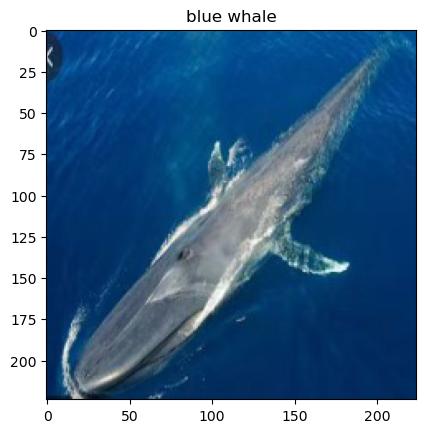

In [8]:
def preprocess_image(path):
    img=plt.imread(path)
    im=cv2.resize(img,(224,224))
    return im/255.0
# preprocess images
img=preprocess_image(df.loc[15,'path'])
label=df.loc[15,'label']
plt.imshow(img)
plt.title(label)

In [9]:
n_examples=len(df)
n_classes=len(classes)
# initialize X and Y
X=np.zeros((n_examples,224,224,3),dtype=np.float32)
Y=np.zeros((n_examples,n_classes),dtype=np.float32)
for i, (path,label) in enumerate(df.values):
    X[i]=preprocess_image(path)
    Y[i,species_to_label[label]]=1
print(X.shape)
print(Y.shape)

(79, 224, 224, 3)
(79, 11)


In [10]:
# split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
# make model
model = Sequential()
base_model=VGG19(weights='imagenet',include_top=False,input_shape=(224,224,3),pooling='avg')
# add new layers
model.add(base_model)
model.add(Dense(1000, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(n_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
dense (Dense)                (None, 1000)              513000    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               128128    
_________________________________________________________________
dense_2 (Dense)              (None, 11)                1419      
Total params: 20,666,931
Trainable params: 20,666,931
Non-trainable params: 0
_________________________________________________________________


In [12]:
batch_size = 16
epochs = 30
learning_rate = 1e-3
# compile model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# train model
history=model.fit(X_train,Y_train,epochs=epochs, batch_size=batch_size,validation_data=(X_test,Y_test))

Epoch 1/30
4/4 [==============================] - 179s 43s/step - loss: 61.5201 - accuracy: 0.0794 - val_loss: 2.3269 - val_accuracy: 0.0625
Epoch 2/30
4/4 [==============================] - 125s 32s/step - loss: 2.3438 - accuracy: 0.1746 - val_loss: 2.4241 - val_accuracy: 0.1875
Epoch 3/30
4/4 [==============================] - 159s 41s/step - loss: 2.2292 - accuracy: 0.2698 - val_loss: 2.7105 - val_accuracy: 0.1250
Epoch 4/30
4/4 [==============================] - 144s 36s/step - loss: 2.4471 - accuracy: 0.2063 - val_loss: 2.3767 - val_accuracy: 0.1875
Epoch 5/30
4/4 [==============================] - 149s 38s/step - loss: 2.2471 - accuracy: 0.2698 - val_loss: 2.3666 - val_accuracy: 0.1875
Epoch 6/30
4/4 [==============================] - 138s 34s/step - loss: 2.3061 - accuracy: 0.2698 - val_loss: 2.4095 - val_accuracy: 0.1875
Epoch 7/30
4/4 [==============================] - 120s 30s/step - loss: 2.2367 - accuracy: 0.2698 - val_loss: 2.4101 - val_accuracy: 0.1875
Epoch 8/30
4/4 [===

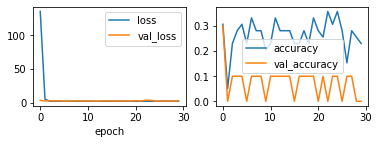

In [ ]:
# plot loss and accuracy 2,2 subplot
plt.subplot(2,2,1,figsize=(10,10))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(2,2,2,figsize=(10,10))
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()


In [ ]:
# save model
model.save('model.h5')
# load model
from tensorflow.keras.models import load_model
model=load_model('model.h5')

1/1 [==============================] - 3s 3s/step - loss: 2.3615 - accuracy: 0.0000e+00
Test accuracy: 0.000


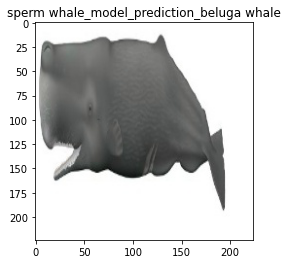

In [172]:
# make predictions
plt.imshow(X_test[1])
plt.title(label_to_species[np.argmax(Y_test[1])]+'_model_prediction_'+label_to_species[np.argmax(model.predict(X_test[1:2]))])
# print test accuracy  two decimal places with fsprintf
#print('Test accuracy: %.2f' % (model.evaluate(X_test,Y_test)[1]*100))
# print test accuracy  two decimal places with f string
print(f'Test accuracy: {model.evaluate(X_test,Y_test)[1]*100:.3f}')

In [170]:
def model_predict(path):
    img=plt.imread(path)
    img=cv2.resize(img,(224,224))
    img=img/255.0
    img=img.reshape(1,224,224,3)
    return label_to_species[np.argmax(model.predict(img))]
model_predict('E:/python_projects/whale_dectection/newimage/ganges 5.jpg')

'beluga whale'

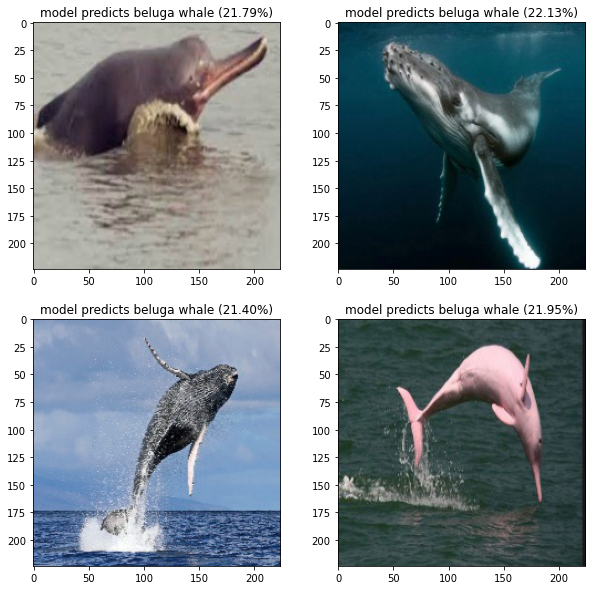

In [171]:
def model_predict(path):
    im = np.array([preprocess_image(path)])
    prediction = model.predict(im)
    # return prediction label and probability
    return label_to_species[np.argmax(prediction)], np.max(prediction)
plt.figure(figsize=(10, 10))
for n, path in enumerate(os.listdir('E:/python_projects/whale_dectection/newimage')): 
    prediction, confidence = model_predict('E:/python_projects/whale_dectection/newimage/' + path)
    plt.subplot(2, 2, n+1)
    # add title to each subplot
    plt.title(f'model predicts {prediction} ({confidence*100:.2f}%)')
    plt.imshow(preprocess_image('E:/python_projects/whale_dectection/newimage/' + path))

# Prediction 
![prediction.jpg](attachment:prediction.jpg)

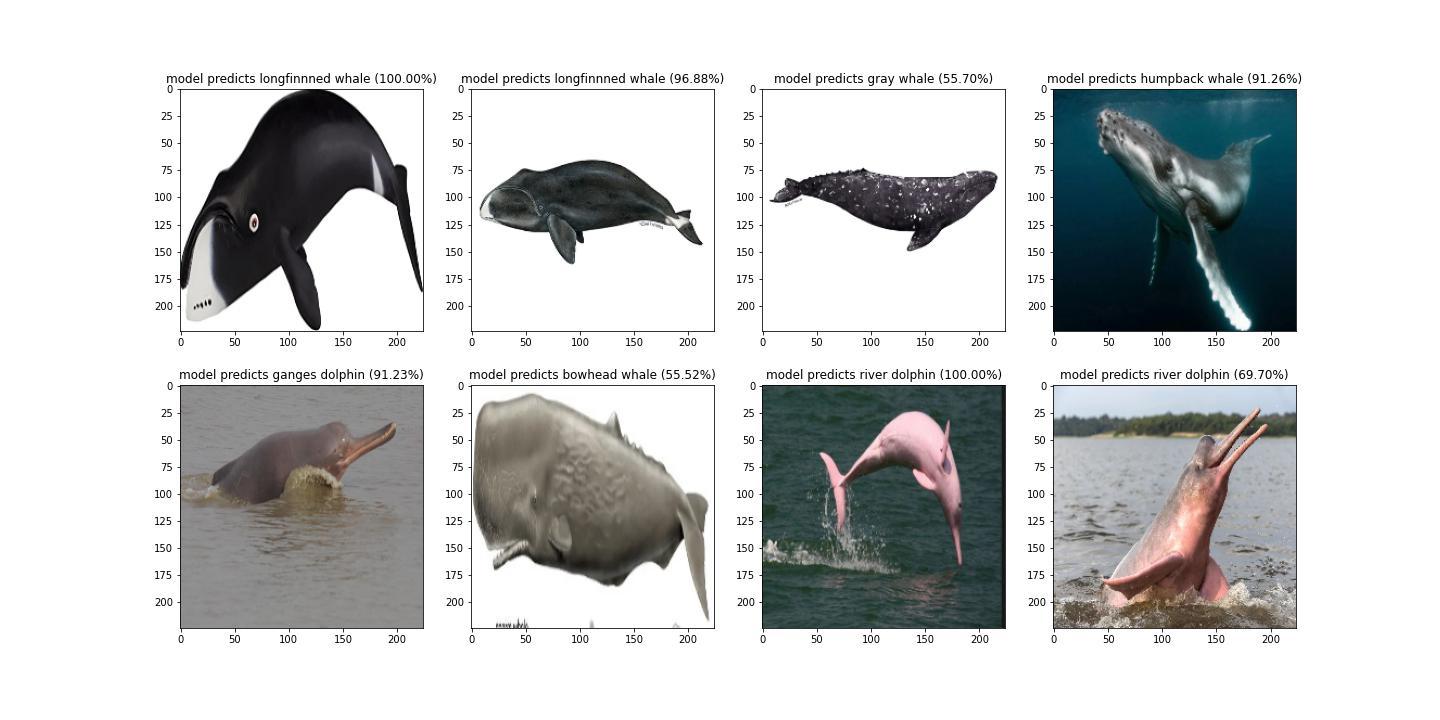

In [1]:
from IPython import display
display.Image(r"E:\python_projects\whale_dectection\CNN_MarineMammal_Prediction\prediction.jpg")